**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\swathi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.

### Check no.of records and features given in each dataset
hint - check shape

In [3]:
books.shape

(271360, 8)

In [4]:
users.shape

(278858, 3)

In [5]:
ratings.shape

(1149780, 3)

## Exploring books dataset

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


### Drop last three columns containing image URLs which will not be required for analysis

In [7]:
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis=1, inplace = True)

In [8]:
books.shape

(271360, 5)

**yearOfPublication**

### Check unique values of yearOfPublication


In [9]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [10]:
books[books['yearOfPublication'] == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [11]:
books[((books['yearOfPublication'] == 'DK Publishing Inc') | (books['yearOfPublication'] == 'Gallimard'))]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [12]:
books = books[~((books['yearOfPublication'] == 'DK Publishing Inc') | (books['yearOfPublication'] == 'Gallimard'))]

In [13]:
books.shape

(271357, 5)

### Change the datatype of yearOfPublication to 'int'

In [14]:
books['yearOfPublication'] = books['yearOfPublication'].astype('int')

In [15]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271357 non-null object
bookTitle            271357 non-null object
bookAuthor           271356 non-null object
yearOfPublication    271357 non-null int32
publisher            271355 non-null object
dtypes: int32(1), object(4)
memory usage: 11.4+ MB


### Drop NaNs in `'publisher'` column


In [16]:
books = books[~(books['publisher'].isna())]

In [17]:
books.shape

(271355, 5)

## Exploring Users dataset

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [19]:
users.head(10)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


### Get all unique values in ascending order for column `Age`

In [20]:
users_age_list = sorted(users['Age'].unique())
print(users_age_list)

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [21]:
nonqualified_ages = users.Age[((users['Age'] < 5) | (users['Age'] > 90))].unique().tolist()
users.replace(nonqualified_ages, np.nan, inplace = True)

In [22]:
print(sorted(users['Age'].unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


### Replace null values in column `Age` with mean

In [23]:
users.replace(np.nan, users['Age'].mean(), inplace = True)

### Change the datatype of `Age` to `int`

In [24]:
users['Age'] = users['Age'].astype('int')

In [25]:
print(sorted(users['Age'].unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [26]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null float64
Location    278858 non-null object
Age         278858 non-null int32
dtypes: float64(1), int32(1), object(1)
memory usage: 5.3+ MB


## Exploring the Ratings Dataset

### check the shape

In [27]:
ratings.shape

(1149780, 3)

In [28]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [29]:
ratings = ratings[ratings.ISBN.isin(books.ISBN)]

In [30]:
ratings.shape

(1031130, 3)

In [31]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [32]:
ratings = ratings[(ratings.userID.isin(users.userID))]

In [33]:
ratings.shape

(1031061, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [34]:
ratings = ratings[~(ratings['bookRating']==0)]

In [35]:
ratings.shape

(383793, 3)

### Find out which rating has been given highest number of times

In [36]:
ratings['bookRating'].value_counts()

8     91791
10    71219
7     66393
9     60766
5     45352
6     31682
4      7617
3      5117
2      2375
1      1481
Name: bookRating, dtype: int64

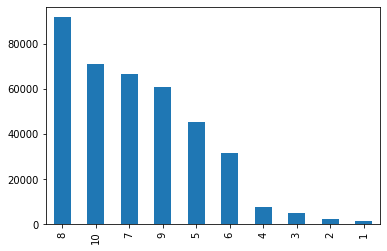

In [37]:
ratings['bookRating'].value_counts().plot(kind = 'bar')

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [39]:
users_count = ratings['userID'].value_counts()
users_rated_atleast100books = (users_count >= 100).index
ratings = ratings[ratings['userID'].isin(users_rated_atleast100books)]

In [40]:
ratings.shape

(383793, 3)

### Transform data to surprise format

In [41]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
reader = Reader(rating_scale=(1, 10))

In [42]:
data = Dataset.load_from_df(ratings[['userID', 'ISBN', 'bookRating']], reader)

In [43]:
data

#### 

### Points to Note:
1) Trainset is no longer a pandas dataframe. Rather, it's a specific datatypes defined by the Surprise library


2) UserID and ISBN in the pandas dataframe can contain any value (either string/integer etc). However, Trainset convert these raw ids into numeric indexes called as "inner id"


3) Methods are provided to convert rw id to inner id and vice verca

### SVD Based Recommendation System

### Split the above data into trainset and testset

In [44]:
from surprise.model_selection import train_test_split

In [45]:
trainset, testset =  train_test_split(data, test_size=.25, random_state = 7)
type(trainset)

surprise.trainset.Trainset

### Explore trainset and testset

In [46]:
user_records = trainset.ur
type(user_records)

collections.defaultdict

In [1]:
#for u in user_records:
   # print(u)

In [48]:
user_records[0]

[(0, 10.0),
 (3100, 9.0),
 (3287, 10.0),
 (5560, 7.0),
 (6120, 10.0),
 (8093, 8.0),
 (8302, 10.0),
 (12953, 8.0),
 (14768, 9.0),
 (16246, 8.0),
 (13889, 10.0),
 (16652, 10.0),
 (17334, 10.0),
 (18255, 7.0),
 (18726, 8.0),
 (11390, 10.0),
 (12327, 10.0),
 (23660, 8.0),
 (24401, 10.0),
 (5586, 9.0),
 (15971, 10.0),
 (27917, 8.0),
 (30766, 6.0),
 (179, 10.0),
 (29343, 8.0),
 (1812, 7.0),
 (2559, 8.0),
 (38689, 7.0),
 (9238, 10.0),
 (21195, 8.0),
 (33485, 8.0),
 (7819, 10.0),
 (21342, 9.0),
 (45584, 8.0),
 (45620, 8.0),
 (12037, 8.0),
 (46616, 9.0),
 (33639, 8.0),
 (7290, 9.0),
 (33693, 8.0),
 (50960, 9.0),
 (52443, 5.0),
 (52502, 8.0),
 (92, 9.0),
 (52846, 10.0),
 (54976, 6.0),
 (5203, 8.0),
 (21724, 8.0),
 (56449, 6.0),
 (32565, 10.0),
 (2319, 9.0),
 (61919, 5.0),
 (28764, 7.0),
 (10553, 9.0),
 (934, 9.0),
 (30756, 8.0),
 (68315, 5.0),
 (12434, 10.0),
 (71473, 7.0),
 (52175, 9.0),
 (15064, 9.0),
 (71874, 8.0),
 (24161, 10.0),
 (74787, 7.0),
 (24252, 10.0),
 (18575, 9.0),
 (27575, 8.0),
 

In [49]:
print(trainset.to_raw_uid(0))
print(trainset.to_raw_iid(10))

277427
0345404785


### Import SVD from Surprise and for on trainset

In [50]:
from surprise import SVD
from surprise import accuracy

In [51]:
algo = SVD()
algo.fit(trainset)

### Predict ratings for testset and check RMSE

In [52]:
predictions = algo.test(testset)

In [55]:
accuracy.rmse(predictions)

RMSE: 1.6360


1.635958088133304

### Generating top n recommendations for a user

In [56]:
top_recommended_books = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())

In [59]:
top_recommended_books.sort_values('bookRating', ascending = False).head(10)

,bookRating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320
059035342X,313
0142001740,307
0446672211,295
044023722X,281
